<a href="https://colab.research.google.com/github/akmalrusdy/python/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
df = pd.DataFrame({'X': [0.7, 1.5, 2.6], 'Y': [0.8, 1.6, 3.0]})

In [129]:
df

,X,Y
0,0.7,0.8
1,1.5,1.6
2,2.6,3.0


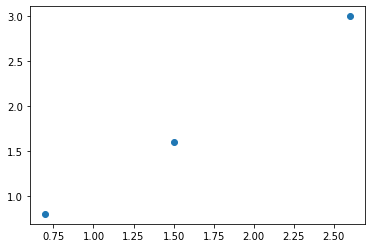

In [130]:
X = df['X']
Y = df['Y']
plt.scatter(X, Y)
plt.show()

In [131]:
x1 = np.array(X)
y1 = np.array(Y)


Linear Regression

y = m(x) + c

m = slope
c = interception

In [184]:
m = 0.5
c = 0

def linear_reg(x):
  y = m*x + c
  return y

In [185]:
y_pred = []
for x in X:
  y_pred.append(linear_reg(x))

In [186]:
y_pred

[0.35, 0.75, 1.3]

Loss Function

In [187]:
l1_loss = pow(y1-y_pred,2)

In [188]:
l1_loss

array([0.2025, 0.7225, 2.89  ])

In [189]:
RSS = l1_loss.sum()
MSE = l1_loss.mean()
print(RSS)
print(MSE)

3.815
1.2716666666666667


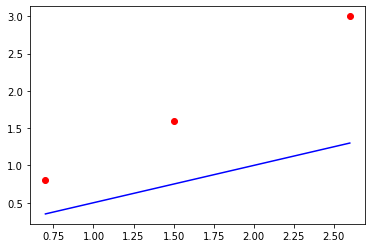

In [190]:
plt.scatter(X, Y, color='red') 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='blue')  # regression line
plt.show()

Learning Rate Optimization



In [194]:
def RSS_opt(m,c,L):
  D_m = -2 * sum(X * (Y - y_pred))  # Derivative wrt m
  D_c = -2 * sum(Y - y_pred)  # Derivative wrt c
  m = m - L * D_m  # Update m
  m = m
  c = c - L * D_c  # Update c
  return (m,c)

def MSE_opt(m,c,L):
  n = float(len(X))
  Y_pred = m*X + c  # The current predicted value of Y
  D_m = (-2/n) * sum(X * (Y - y_pred))  # Derivative wrt m
  D_c = (-2/n) * sum(Y - y_pred)  # Derivative wrt c
  m = m - L * D_m  # Update m
  c = c - L * D_c  # Update c
  return (m,c)


In [237]:
m = 0.5
c = 0
L = 0.1 #Learning Rate
lin_reg_opt_mse = MSE_opt(m,c,L) #Using MSE as Cost Function
lin_reg_opt_rss = RSS_opt(m,c,L) #Using RSS as Cost Function
print(lin_reg_opt_mse)
print(lin_reg_opt_rss)

(0.9006666666666666, 0.2)
(1.702, 0.6000000000000001)


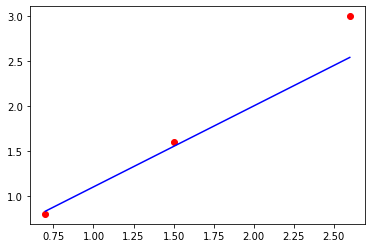

In [240]:
# Making predictions
m = lin_reg_opt_mse[0]
c = lin_reg_opt_mse[1]
y_pred_opt = m*X + c

plt.scatter(X, Y, color = 'red') 
plt.plot([min(X), max(X)], [min(y_pred_opt), max(y_pred_opt)], color='blue')  # regression line
plt.show()

In [245]:
l1_loss_opt = pow(y1-y_pred_opt,2)
print("MSE:",l1_loss_opt.mean())
print("RSS:",l1_loss_opt.sum())

MSE: 0.07111251851851844
RSS: 0.2133375555555553


Linear Regression using sklearn.linear_model

In [210]:
from sklearn.linear_model import LinearRegression
X1 = df[["X"]]
Y1 = df[["Y"]]


regressor = LinearRegression()
regressor.fit(X1, Y1)

LinearRegression()

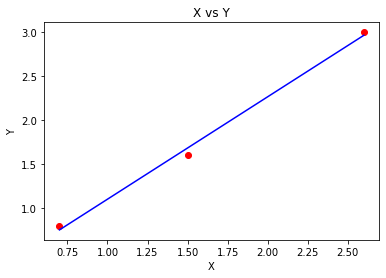

In [211]:
plt.scatter(X1, Y1, color = 'red')
plt.plot(X1, regressor.predict(X1), color = 'blue')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [212]:
print(regressor.intercept_)

[-0.06373626]


In [213]:
print(regressor.coef_)

[[1.16483516]]


In [214]:
l1_loss_reg = pow(Y1-regressor.predict(X1),2)

In [216]:
l1_loss_reg.mean()

Y    0.003516
dtype: float64